In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string as str

In [2]:
df= pd.read_csv('amazon_baby.csv')

In [3]:
df=df.fillna({'review': ''})

In [4]:
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [5]:
def remove_punctuation(text):
    import string
    trans=text.maketrans('', '',string.punctuation) 
    translated=text.translate(trans)
    return translated

df['review_clean'] = df['review'].apply(remove_punctuation)

Extract Sentiment 

In [6]:
df=df[df['rating'] != 3]

In [7]:
df.head()

,name,review,rating,review_clean
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...


In [8]:
df['sentiment']=df['rating'].apply(lambda rating : +1 if rating > 3 else -1)

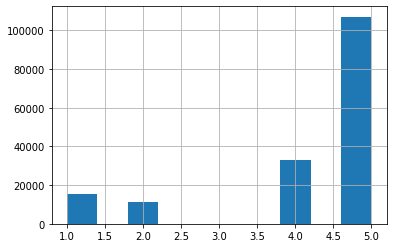

In [9]:
df['rating'].hist()

In [10]:
import json

In [11]:
with open('module-2-assignment-test-idx.json') as test_data_file:    
    test_data_idx = json.load(test_data_file)
with open('module-2-assignment-train-idx.json') as train_data_file:    
    train_data_idx = json.load(train_data_file)
print (train_data_idx[:3])
print (test_data_idx[:3])

[0, 1, 2]
[8, 9, 14]


In [12]:
train_data=df.iloc[train_data_idx]

In [13]:
test_data=df.iloc[test_data_idx]

In [14]:
train_data.head(2)

,name,review,rating,review_clean,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1


In [15]:
test_data.head(2)

,name,review,rating,review_clean,sentiment
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,1


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
import re

In [18]:
cv=CountVectorizer(token_pattern=r'\b\w+\b')

In [19]:
train_matrix=cv.fit_transform(train_data['review_clean'])

Using the same word-column mapping convert the test data to matrix

In [20]:
test_matrix=cv.transform(test_data['review_clean'])

In [106]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
logit=lg.fit(train_matrix, train_data['sentiment'])

In [22]:
np.sum(lg.coef_>=0) 

85877

In [23]:
sample_test_data = test_data.iloc[10:13]
print (sample_test_data)

                                                 name  \
59                          Our Baby Girl Memory Book   
71  Wall Decor Removable Decal Sticker - Colorful ...   
91  New Style Trailing Cherry Blossom Tree Decal R...   

                                               review  rating  \
59  Absolutely love it and all of the Scripture in...       5   
71  Would not purchase again or recommend. The dec...       2   
91  Was so excited to get this product for my baby...       1   

                                         review_clean  sentiment  
59  Absolutely love it and all of the Scripture in...          1  
71  Would not purchase again or recommend The deca...         -1  
91  Was so excited to get this product for my baby...         -1  


In [24]:
sample_test_matrix=cv.transform(sample_test_data['review_clean'])

In [25]:
scores=lg.decision_function(sample_test_matrix)
print(scores)

[  5.60840687  -3.12665506 -10.42354879]


In [26]:
print (lg.predict(sample_test_matrix))

[ 1 -1 -1]


In [29]:
[1./(1+np.exp(-x))for x in scores]

[0.9963464905221259, 0.04202105249112379, 2.972332361958972e-05]

In [33]:
test_data_scores=lg.decision_function(test_matrix)
test_data_scores

array([ 1.28356054, 14.11308256,  2.65050867, ..., 12.12507657,
       12.87935189,  3.96023864])

In [34]:
[1./(1+np.exp(-x))for x in test_data_scores]

[0.7830552487540569,
 0.9999992573814368,
 0.9340423351729521,
 0.9999785563030058,
 0.9803177678942852,
 0.9999546831363793,
 0.9987382573777935,
 0.8080619956630694,
 0.9984659642661435,
 0.9973127994282394,
 0.9963464905221259,
 0.04202105249112379,
 2.972332361958972e-05,
 0.9955553312860468,
 0.9930696709849642,
 0.9764919407966677,
 0.9926138559269905,
 0.9397065196025173,
 0.040088973112148374,
 0.9989319847729823,
 0.9986082299700829,
 0.9990365101130947,
 0.9999999499686162,
 0.9999690866007753,
 0.9999760269976127,
 0.9788657632618387,
 0.9747694906234219,
 0.9530746248901469,
 0.9999999996030193,
 0.9996212449389702,
 0.9902431785947442,
 0.9995994318612409,
 0.9999563905302468,
 0.9999986390449892,
 0.9999871456537764,
 0.9994009744729588,
 0.9998602734104205,
 0.9951993685035286,
 0.9229898772736524,
 0.9942072970565572,
 0.8115164132451705,
 0.9924364502599756,
 0.9267751640559304,
 0.9796699238471918,
 0.9835988671426076,
 0.9966983495441524,
 0.9979702896545034,
 0.8463

In [42]:
positive_reviews=np.argsort(-test_data_scores)[:20]
print(positive_reviews)

[18112 15732 24286 25554 24899  9125 21531 32782 30535  9555 14482 30634
 17558 26830 11923 20743 30076  4140 33060 26838]


In [43]:
test_data.iloc[positive_reviews]

,name,review,rating,review_clean,sentiment
100166,"Infantino Wrap and Tie Baby Carrier, Black Blu...",I bought this carrier when my daughter was abo...,5,I bought this carrier when my daughter was abo...,1
87017,Baby Einstein Around The World Discovery Center,I am so HAPPY I brought this item for my 7 mon...,5,I am so HAPPY I brought this item for my 7 mon...,1
133651,"Britax 2012 B-Agile Stroller, Red",[I got this stroller for my daughter prior to ...,4,I got this stroller for my daughter prior to t...,1
140816,"Diono RadianRXT Convertible Car Seat, Plum",I bought this seat for my tall (38in) and thin...,5,I bought this seat for my tall 38in and thin 2...,1
137034,Graco Pack 'n Play Element Playard - Flint,My husband and I assembled this Pack n' Play l...,4,My husband and I assembled this Pack n Play la...,1
50315,"P'Kolino Silly Soft Seating in Tias, Green",I've purchased both the P'Kolino Little Reader...,4,Ive purchased both the PKolino Little Reader C...,1
119182,Roan Rocco Classic Pram Stroller 2-in-1 with B...,Great Pram Rocco!!!!!!I bought this pram from ...,5,Great Pram RoccoI bought this pram from Europe...,1
180646,Mamas &amp; Papas 2014 Urbo2 Stroller - Black,After much research I purchased an Urbo2. It's...,4,After much research I purchased an Urbo2 Its e...,1
168081,Buttons Cloth Diaper Cover - One Size - 8 Colo...,"We are big Best Bottoms fans here, but I wante...",4,We are big Best Bottoms fans here but I wanted...,1
52631,Evenflo X Sport Plus Convenience Stroller - Ch...,After seeing this in Parent's Magazine and rea...,5,After seeing this in Parents Magazine and read...,1


In [45]:
negative_reviews=np.argsort(test_data_scores)[:20]
print(negative_reviews)

[ 2931 21700 13939  8818 28184 17069  9655 14711 20594  1942 10814  1810
 31226 13751  7310 27231 28120   205 15062  5831]


In [46]:
test_data.iloc[negative_reviews]

,name,review,rating,review_clean,sentiment
16042,Fisher-Price Ocean Wonders Aquarium Bouncer,We have not had ANY luck with Fisher-Price pro...,2,We have not had ANY luck with FisherPrice prod...,-1
120209,Levana Safe N'See Digital Video Baby Monitor w...,This is the first review I have ever written o...,1,This is the first review I have ever written o...,-1
77072,Safety 1st Exchangeable Tip 3 in 1 Thermometer,I thought it sounded great to have different t...,1,I thought it sounded great to have different t...,-1
48694,Adiri BPA Free Natural Nurser Ultimate Bottle ...,I will try to write an objective review of the...,2,I will try to write an objective review of the...,-1
155287,VTech Communications Safe &amp; Sounds Full Co...,"This is my second video monitoring system, the...",1,This is my second video monitoring system the ...,-1
94560,The First Years True Choice P400 Premium Digit...,Note: we never installed batteries in these un...,1,Note we never installed batteries in these uni...,-1
53207,Safety 1st High-Def Digital Monitor,We bought this baby monitor to replace a diffe...,1,We bought this baby monitor to replace a diffe...,-1
81332,Cloth Diaper Sprayer--styles may vary,I bought this sprayer out of desperation durin...,1,I bought this sprayer out of desperation durin...,-1
113995,Motorola Digital Video Baby Monitor with Room ...,DO NOT BUY THIS BABY MONITOR!I purchased this ...,1,DO NOT BUY THIS BABY MONITORI purchased this m...,-1
10677,Philips AVENT Newborn Starter Set,"It's 3am in the morning and needless to say, t...",1,Its 3am in the morning and needless to say thi...,-1


In [55]:
predictions=lg.predict(test_matrix)
true_preds=np.sum(predictions == test_data['sentiment'])
total_preds=len(test_data)
accuracy=true_preds/total_preds
print(accuracy)

0.9321154307655387


In [53]:
true_preds

31073

In [56]:
significant_words = ['love', 'great', 'easy', 'old', 'little', 'perfect', 'loves', 
      'well', 'able', 'car', 'broke', 'less', 'even', 'waste', 'disappointed', 
      'work', 'product', 'money', 'would', 'return']

In [57]:
cv_fewer=CountVectorizer(vocabulary=significant_words)

In [58]:
train_matrix1=cv_fewer.fit_transform(train_data['review_clean'])
test_matrix1=cv_fewer.transform(test_data['review_clean'])

In [60]:
lg_alt=LogisticRegression()
lg_alt.fit(train_matrix1, train_data['sentiment'])

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
lg_alt_model=pd.DataFrame({'words': significant_words, 'coefficients':lg_alt.coef_.flatten() })

In [197]:
lg_alt.intercept_

array([1.29937369])

In [198]:
lg_alt.coef_

array([[ 1.36368976,  0.94399959,  1.19253827,  0.08551278,  0.52018576,
         1.50981248,  1.67307389,  0.50376046,  0.19090857,  0.05885467,
        -1.65157634, -0.20956286, -0.51137963, -2.03369861, -2.34829822,
        -0.62116877, -0.32055624, -0.89803074, -0.36216674, -2.10933109]])

In [193]:
lg_alt_model

,words,coefficients
0,love,1.363690
1,great,0.944000
2,easy,1.192538
3,old,0.085513
4,little,0.520186
5,perfect,1.509812
6,loves,1.673074
7,well,0.503760
8,able,0.190909
9,car,0.058855


In [68]:
len(lg_alt_model[lg_alt_model['coefficients'] > 0])

10

In [161]:
positive_lg_alt_model=lg_alt_model[lg_alt_model['coefficients'] > 0]
positive_lg_alt_model

,words,coefficients
0,love,1.363690
1,great,0.944000
2,easy,1.192538
3,old,0.085513
4,little,0.520186
5,perfect,1.509812
6,loves,1.673074
7,well,0.503760
8,able,0.190909
9,car,0.058855


In [163]:
pl=positive_lg_alt_model['words'].tolist()

In [71]:
(lg_alt_model['words'] == lg.coef_)

array([[-1.23864786e+00,  1.63829757e-04,  2.63353308e-02, ...,
         1.17300933e-02,  3.11259447e-03, -6.45352102e-05]])

In [111]:
significant_words

['love',
 'great',
 'easy',
 'old',
 'little',
 'perfect',
 'loves',
 'well',
 'able',
 'car',
 'broke',
 'less',
 'even',
 'waste',
 'disappointed',
 'work',
 'product',
 'money',
 'would',
 'return']

In [131]:
word_coff=zip(cv.get_feature_names(),logit.coef_[0])

In [132]:
dataframe=pd.DataFrame(word_coff)

In [133]:
dataframe.head()

,0,1
0,0,-1.238648
1,00,0.000164
2,000,0.026335
3,0001,0.005493
4,001,0.000035


In [141]:
dataframe.sort_values(1, ascending=False,inplace=True)

In [165]:
dataframe[dataframe[0].isin(pl)]

,0,1
78982,perfect,1.862930
63567,love,1.578642
63646,loves,1.517420
37640,easy,1.356873
48789,great,1.228073
62602,little,0.638586
117906,well,0.542647
7386,able,0.389431
22122,car,0.126364
74106,old,0.053091


In [ ]:
lg_alt_model

In [168]:
train_predictions=lg.predict(train_matrix)
correct_train_predictions=np.sum(train_predictions == train_data['sentiment'])
total_train_predictions=len(train_data)
accuracy_train=correct_train_predictions/total_train_predictions                                
accuracy_train

0.967934880374168

In [173]:
train_predictions1=lg_alt.predict(train_matrix1)
correct_train_predictions1=np.sum(train_predictions1 == train_data['sentiment'])
total_train_predictions1=len(train_data)
accuracy_train1=correct_train_predictions1/total_train_predictions1                                
accuracy_train1

0.8668225700065959

In [174]:
test_predictions=lg.predict(test_matrix)
correct_test_predictions=np.sum(test_predictions == test_data['sentiment'])
total_test_predictions=len(test_data)
accuracy_test=correct_test_predictions/total_test_predictions                                
accuracy_test

0.9321154307655387

In [175]:
test_predictions1=lg_alt.predict(test_matrix1)
correct_test_predictions1=np.sum(test_predictions1 == test_data['sentiment'])
total_test_predictions1=len(test_data)
accuracy_test1=correct_test_predictions1/total_test_predictions1                                
accuracy_test1

0.8693604511639069

In [184]:
positive_labels=len(test_data[test_data['sentiment'] > 0])
negative_labels= len(test_data[test_data['sentiment']<0])
print('The number of positive class is {} and the number of negative class is {}'.format(positive_labels, negative_labels))

The number of positive class is 28095 and the number of negative class is 5241


In [191]:
majority_baseline_accuracy=positive_labels/(positive_labels+ negative_labels)
print('The majority baseline accuracy is {}'.format(majority_baseline_accuracy))

The majority baseline accuracy is 0.8427825773938085
